In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score 

from joblib import Parallel, delayed

In [11]:
target = pd.read_csv('/home/INT/mifsud.l/Bureau/pattern_classification_git/results/target.csv')

In [68]:
spike_convolved = np.load('/home/INT/mifsud.l/Bureau/pattern_classification_git/results/spike_convolved.npy')

In [69]:
spike_convolved.shape

(176, 7304, 43)

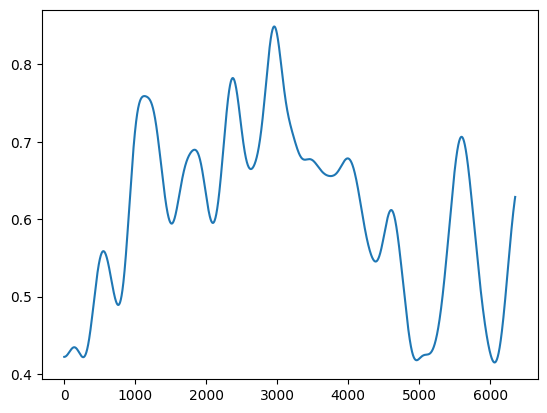

In [70]:
plt.plot(spike_convolved[:, :, 32].mean(axis=0))

In [29]:
target

,Unnamed: 0,trial_type,position,type_and_pos
0,0,1,2,0
1,1,1,2,0
2,2,1,3,1
3,3,1,3,1
4,4,1,4,2
...,...,...,...,...
171,171,1,3,1
172,172,2,3,4
173,173,2,4,5
174,174,2,4,5


In [32]:
?cross_val_score

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

    .

In [33]:
# Build pipeline
n_splits = 2
# Cross-validation scheme
cvs0 = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)
# Standardisation scheme
scaler = StandardScaler()
# Algo
estimator = HistGradientBoostingClassifier(max_iter=5, max_depth=10, max_bins=10)
clf = make_pipeline(scaler, estimator)

In [75]:
def classify(X, y):
    if np.isnan(X).any() : 
        return np.nan
    else : 
        return cross_val_score(clf, X.reshape(-1,1), y, cv=cvs0, n_jobs=1).mean() 

In [81]:
n_trials, n_times, n_neurons = spike_convolved.shape
X_n = spike_convolved[:,:,0]
da = np.zeros((n_neurons, n_times))

for n in range(n_neurons) :
    X_n =  spike_convolved[:,:,n]
    da[n, :] = Parallel(n_jobs=-1)(delayed(classify)(X_n[:,t], target['trial_type']) for t in range(n_times))

In [83]:
da.shape

(43, 7304)

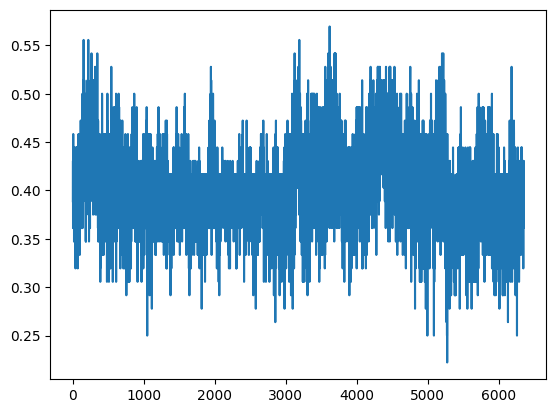

In [84]:
plt.plot(da[0,:])

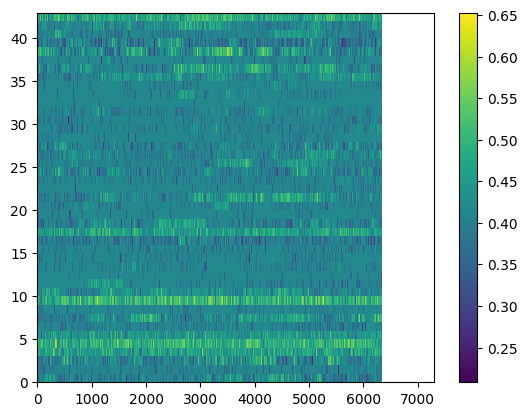

In [86]:
plt.pcolormesh(da)
plt.colorbar()

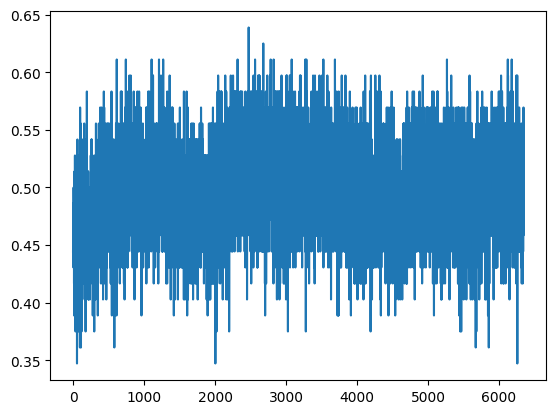

In [90]:
plt.plot(da[9,:])

In [91]:
spike_convolved.shape

(176, 7304, 43)

In [114]:
df = pd.DataFrame(spike_convolved[:,:,32], index=target['trial_type'])

In [115]:
df_ex = df.melt(value_vars=np.arange(n_times), value_name='fr', ignore_index=False).reset_index()

In [116]:
df_ex

,trial_type,variable,fr
0,1,0,0.0
1,1,0,0.0
2,1,0,0.0
3,1,0,0.0
4,1,0,0.0
...,...,...,...
1285499,1,7303,NaN
1285500,2,7303,NaN
1285501,2,7303,NaN
1285502,2,7303,NaN


<Axes: xlabel='variable', ylabel='fr'>

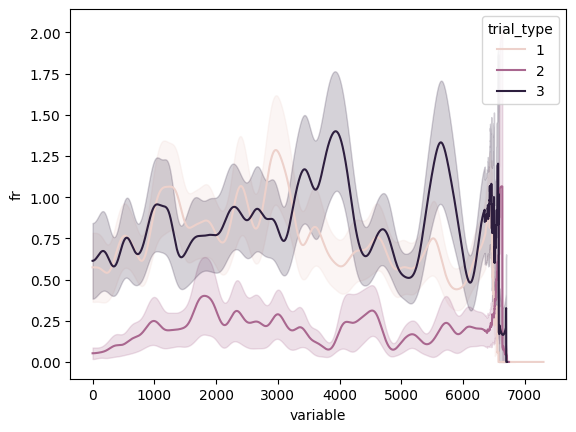

In [118]:
sns.lineplot(
    data=df_ex, 
    x='variable', 
    y='fr', 
    hue = 'trial_type',
    errorbar='se'
)

<Axes: xlabel='variable', ylabel='fr'>

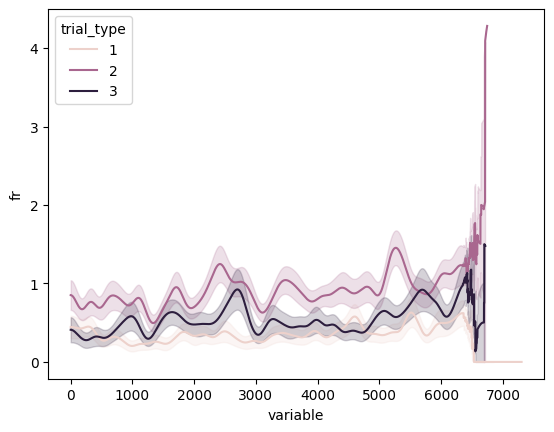

In [119]:
df = pd.DataFrame(spike_convolved[:,:,9], index=target['trial_type'])
df_ex = df.melt(value_vars=np.arange(n_times), value_name='fr', ignore_index=False).reset_index()
sns.lineplot(
    data=df_ex, 
    x='variable', 
    y='fr', 
    hue = 'trial_type',
    errorbar='se'
)

<Axes: xlabel='variable', ylabel='fr'>

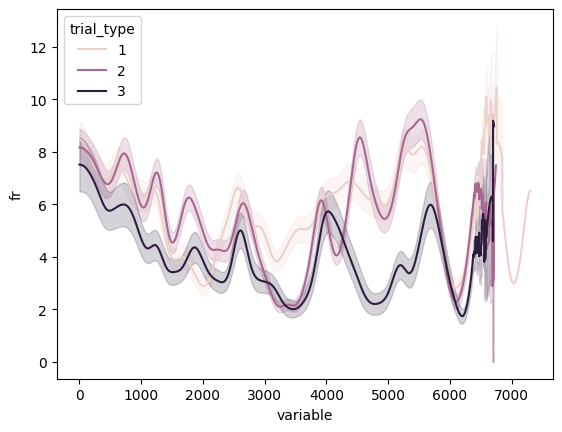

In [120]:
df = pd.DataFrame(spike_convolved[:,:,38], index=target['trial_type'])
df_ex = df.melt(value_vars=np.arange(n_times), value_name='fr', ignore_index=False).reset_index()
sns.lineplot(
    data=df_ex, 
    x='variable', 
    y='fr', 
    hue = 'trial_type',
    errorbar='se'
)

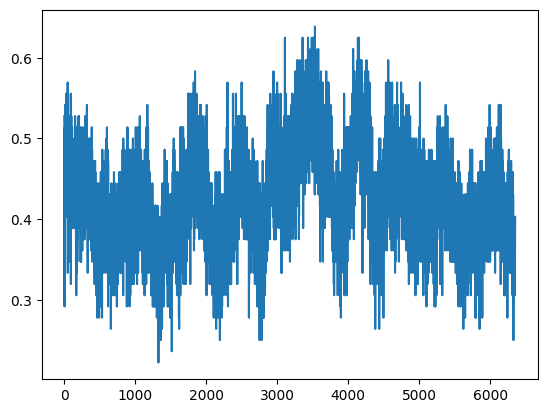

In [121]:
plt.plot(da[38,:])

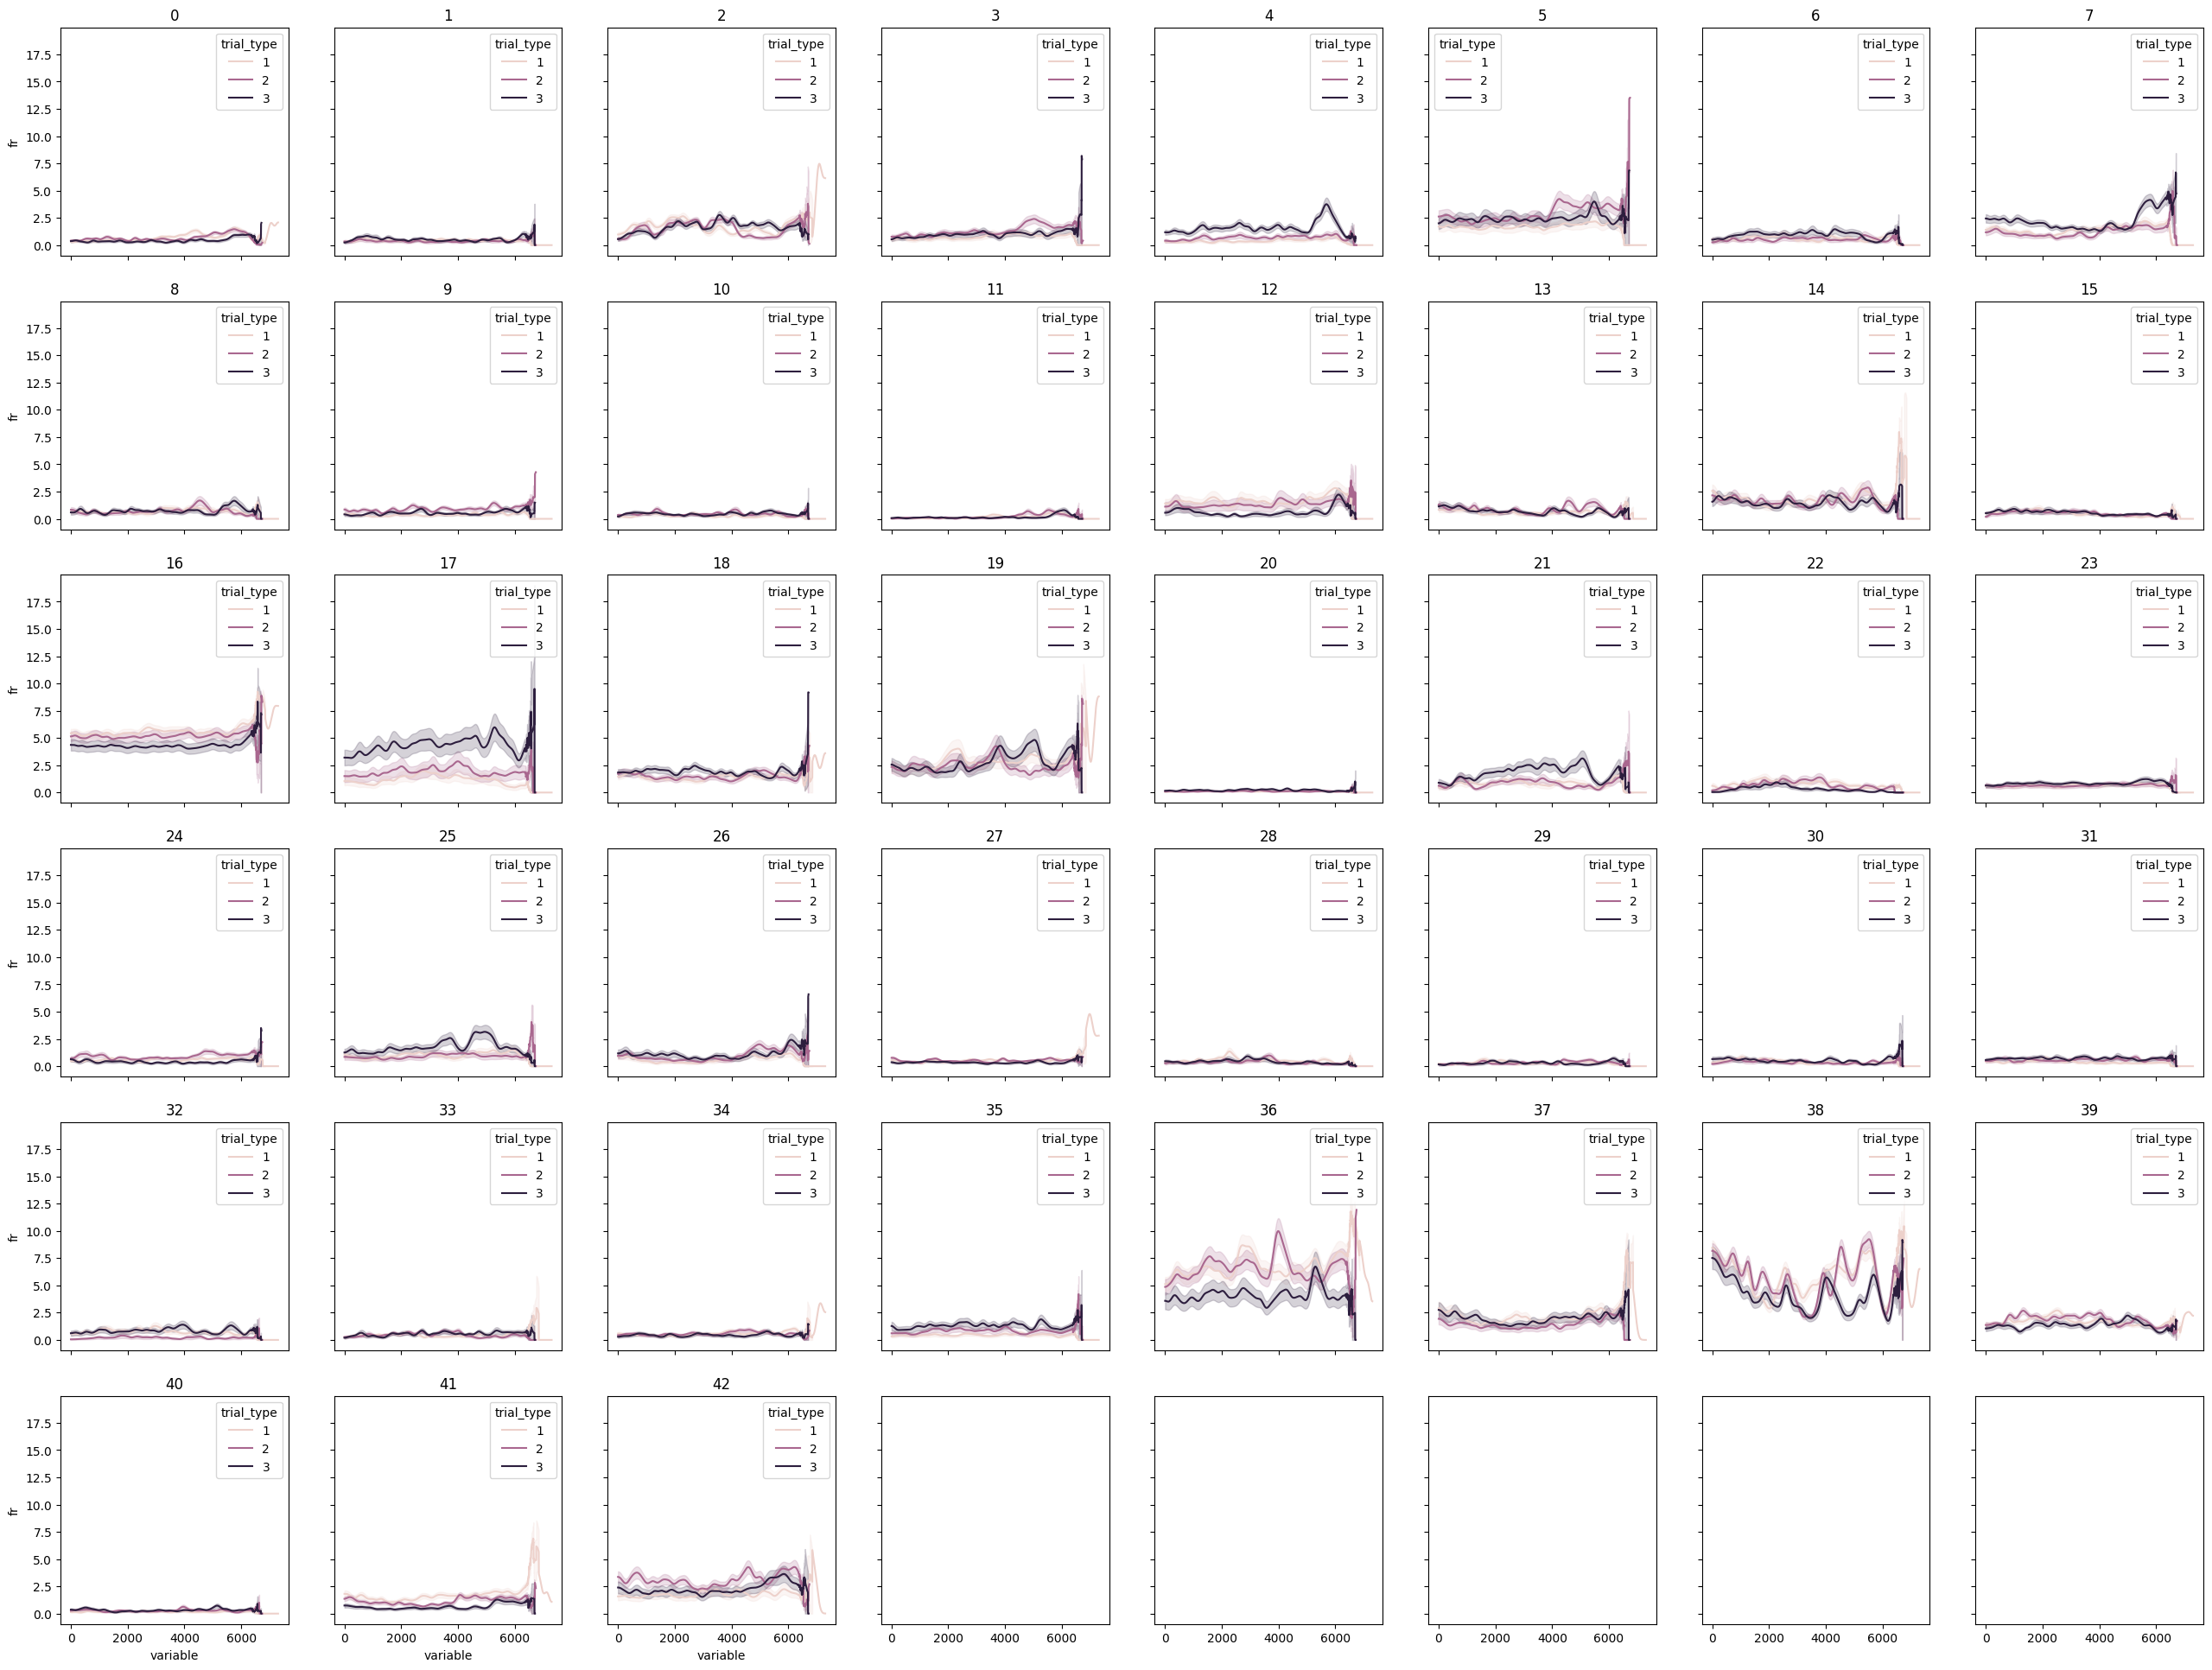

In [126]:
fig, axs = plt.subplots(6,8, figsize=(32,24), sharex=True, sharey=True)

axs = np.ravel(axs)

for n in range(n_neurons):
    plt.sca(axs[n])
    plt.title(n)
    df = pd.DataFrame(spike_convolved[:,:,n], index=target['trial_type'])
    df_ex = df.melt(value_vars=np.arange(n_times), value_name='fr', ignore_index=False).reset_index()
    sns.lineplot(
        data=df_ex, 
        x='variable', 
        y='fr', 
        hue = 'trial_type',
        errorbar='se'
    )

In [123]:
axs.shape

(6, 8)